In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CSAI.csv")

In [3]:
data.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


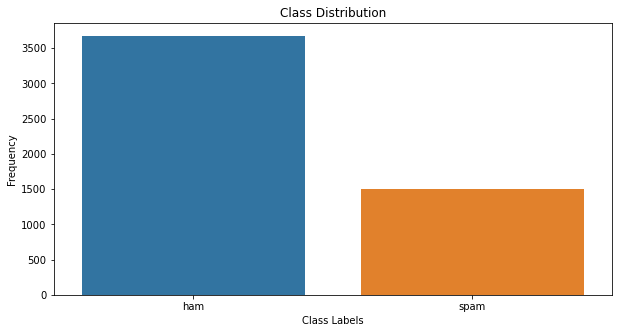

In [4]:
class_counts = data['label'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Class Labels')
plt.show()

In [54]:
data.describe()

,Unnamed: 0,label_num,text_length
count,5171.000000,5171.000000,5171.000000
mean,2585.000000,0.289886,1048.391994
std,1492.883452,0.453753,1528.513435
min,0.000000,0.000000,11.000000
25%,1292.500000,0.000000,244.000000
50%,2585.000000,0.000000,540.000000
75%,3877.500000,1.000000,1237.000000
max,5170.000000,1.000000,32258.000000


In [5]:
#check more common words
from collections import Counter

In [6]:
 data[data['label'] == "ham"]

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
...,...,...,...,...
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0


In [7]:
 data[data['label'] == "spam"]

,Unnamed: 0,label,text,label_num
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
10,4922,spam,Subject: vocable % rnd - word asceticism\r\nvc...,1
11,3799,spam,Subject: report 01405 !\r\nwffur attion brom e...,1
13,3948,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1
...,...,...,...,...
5159,4381,spam,Subject: pictures\r\nstreamlined denizen ajar ...,1
5161,4979,spam,Subject: penny stocks are about timing\r\nnoma...,1
5162,4162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5164,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1


In [8]:
data[data['label'] == "ham"]["text"]

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
4       Subject: re : indian springs\r\nthis deal is t...
5       Subject: ehronline web address change\r\nthis ...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
Name: text, Length: 3672, dtype: object

In [9]:
data[data['label'] == "spam"]["text"]

3       Subject: photoshop , windows , office . cheap ...
7       Subject: looking for medication ? we ` re the ...
10      Subject: vocable % rnd - word asceticism\r\nvc...
11      Subject: report 01405 !\r\nwffur attion brom e...
13      Subject: vic . odin n ^ ow\r\nberne hotbox car...
                              ...                        
5159    Subject: pictures\r\nstreamlined denizen ajar ...
5161    Subject: penny stocks are about timing\r\nnoma...
5162    Subject: anomaly boys from 3881\r\nuosda apapr...
5164    Subject: slutty milf wants to meet you\r\ntake...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 1499, dtype: object

In [10]:
def get_most_common_words(class_label, num_words, column_name, dataset):
    
    text = " ".join(message for message in dataset[dataset['label'] == class_label][column_name])
    words = text.lower().split()
    return Counter(words).most_common(num_words)

In [11]:
get_most_common_words("spam", 30, "text", data)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787),
 ('in', 3129),
 ('=', 3091),
 ('you', 2794),
 ('for', 2523),
 ('!', 2458),
 ('this', 2283),
 ('is', 2256),
 ('your', 1946),
 ('?', 1928),
 ("'", 1762),
 ('$', 1666),
 (')', 1549),
 ('(', 1513),
 ('subject:', 1499),
 ('with', 1470),
 ('that', 1348),
 ('s', 1315),
 ('|', 1309),
 ('be', 1303),
 ('or', 1301)]

In [12]:
get_most_common_words("ham", 30, "text", data)

[('-', 77782),
 ('/', 37141),
 ('.', 35192),
 (',', 29413),
 (':', 20492),
 ('the', 18359),
 ('to', 15172),
 ('ect', 13897),
 ('@', 12168),
 ('for', 7982),
 ('and', 7912),
 ('hou', 7281),
 ('enron', 6555),
 ('on', 6049),
 ('a', 6026),
 ("'", 5780),
 ('of', 5677),
 ('>', 5559),
 ('you', 5365),
 ('i', 5241),
 ('is', 4906),
 ('this', 4878),
 ('in', 4570),
 (')', 4539),
 ('2000', 4308),
 ('(', 4244),
 ('be', 3757),
 (';', 3715),
 ('subject:', 3672),
 ('will', 3441)]

In [13]:
#text length analysis
data["text_length"] = data["text"].apply(len)


In [14]:
data.head()

,Unnamed: 0,label,text,label_num,text_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [15]:
data.groupby("label")["text_length"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,977.008170,1382.827493,18.0,231.75,530.0,1227.25,32258.0
spam,1499.0,1223.256171,1825.986210,11.0,283.00,576.0,1253.50,22073.0


In [16]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [17]:
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [18]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("","",string.punctuation))
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    text = " ".join(words)
    return text

In [19]:
preprocess_text(data["text"].values[0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren override pop s daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [20]:
data["cleaned_text"] = data["text"].apply(preprocess_text)

In [21]:
data.head()

,Unnamed: 0,label,text,label_num,text_length,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [22]:
get_most_common_words("spam", 30, "text", data)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787),
 ('in', 3129),
 ('=', 3091),
 ('you', 2794),
 ('for', 2523),
 ('!', 2458),
 ('this', 2283),
 ('is', 2256),
 ('your', 1946),
 ('?', 1928),
 ("'", 1762),
 ('$', 1666),
 (')', 1549),
 ('(', 1513),
 ('subject:', 1499),
 ('with', 1470),
 ('that', 1348),
 ('s', 1315),
 ('|', 1309),
 ('be', 1303),
 ('or', 1301)]

In [23]:
get_most_common_words("ham", 30, "text", data)

[('-', 77782),
 ('/', 37141),
 ('.', 35192),
 (',', 29413),
 (':', 20492),
 ('the', 18359),
 ('to', 15172),
 ('ect', 13897),
 ('@', 12168),
 ('for', 7982),
 ('and', 7912),
 ('hou', 7281),
 ('enron', 6555),
 ('on', 6049),
 ('a', 6026),
 ("'", 5780),
 ('of', 5677),
 ('>', 5559),
 ('you', 5365),
 ('i', 5241),
 ('is', 4906),
 ('this', 4878),
 ('in', 4570),
 (')', 4539),
 ('2000', 4308),
 ('(', 4244),
 ('be', 3757),
 (';', 3715),
 ('subject:', 3672),
 ('will', 3441)]

In [24]:
get_most_common_words("spam", 30, "cleaned_text", data)

[('subject', 1657),
 ('s', 1316),
 ('3', 1239),
 ('com', 992),
 ('http', 983),
 ('2', 858),
 ('company', 728),
 ('1', 720),
 ('0', 698),
 ('e', 631),
 ('www', 587),
 ('00', 585),
 ('information', 520),
 ('font', 515),
 ('5', 510),
 ('td', 504),
 ('t', 502),
 ('4', 494),
 ('statements', 476),
 ('email', 474),
 ('price', 471),
 ('d', 469),
 ('7', 457),
 ('new', 432),
 ('nbsp', 418),
 ('p', 384),
 ('height', 362),
 ('time', 361),
 ('8', 321),
 ('99', 321)]

In [25]:
get_most_common_words("ham", 30, "cleaned_text", data)

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('subject', 6403),
 ('2000', 4308),
 ('gas', 2861),
 ('deal', 2789),
 ('com', 2717),
 ('meter', 2459),
 ('cc', 2359),
 ('pm', 2325),
 ('hpl', 2318),
 ('s', 2111),
 ('2001', 2024),
 ('1', 2023),
 ('daren', 1901),
 ('000', 1880),
 ('00', 1819),
 ('10', 1815),
 ('thanks', 1813),
 ('01', 1723),
 ('corp', 1710),
 ('3', 1683),
 ('d', 1658),
 ('2', 1521),
 ('know', 1438),
 ('mmbtu', 1349),
 ('e', 1338),
 ('11', 1311),
 ('j', 1300)]

In [26]:
#unique words repeat
from sklearn.feature_extraction.text import CountVectorizer


In [27]:
Vectorizer = CountVectorizer()

In [28]:
X = Vectorizer.fit_transform(data["cleaned_text"])

In [29]:
X

<5171x50179 sparse matrix of type '<class 'numpy.int64'>'
	with 338374 stored elements in Compressed Sparse Row format>

In [30]:
y = data["label_num"]
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(4136, 50179)

In [34]:
X_test.shape

(1035, 50179)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors

knn_model.fit(X, y)

y_pred_knn = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
accuracy

0.8541062801932368

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print (print("Accuracy test set: ", accuracy_score(y_test, y_pred_knn)))
print (print("Precision test set: ", precision_score(y_test, y_pred_knn, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred_knn, average = 'micro' )))
print (print("F-1 score test set: ", f1_score(y_test, y_pred_knn, average = 'micro' )))

Accuracy test set:  0.8541062801932368
None
Precision test set:  0.8541062801932368
None
Recall test set:  0.8541062801932368
None
F-1 score test set:  0.8541062801932368
None


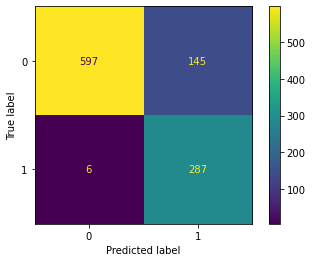

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_model.classes_)
disp.plot()
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)

In [48]:
from sklearn.metrics import accuracy_score

y_pred_clf = clf.predict(X_test)
accuracy_clf = accuracy_score(y_test, y_pred_clf)
accuracy_clf

0.9990338164251208

In [49]:
print (print("Accuracy test set: ", accuracy_score(y_test, y_pred_clf)))
print (print("Precision test set: ", precision_score(y_test, y_pred_clf, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred_clf, average = 'micro' )))
print (print("F-1 score test set: ", f1_score(y_test, y_pred_clf, average = 'micro' )))

Accuracy test set:  0.9990338164251208
None
Precision test set:  0.9990338164251208
None
Recall test set:  0.9990338164251208
None
F-1 score test set:  0.9990338164251208
None


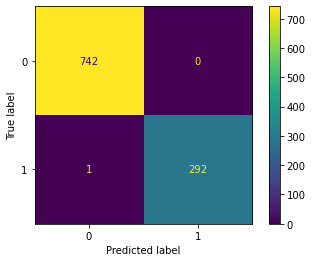

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clf) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

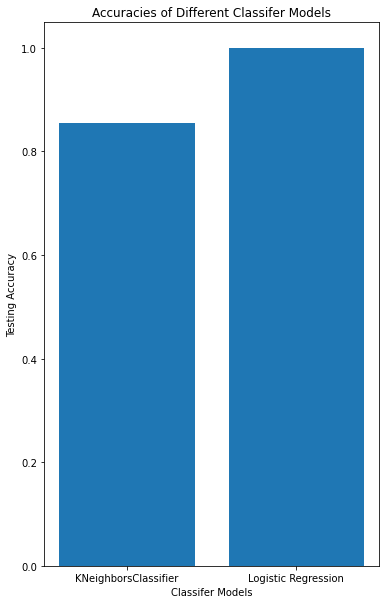

In [52]:
models = ['KNeighborsClassifier','Logistic Regression']
test_scores =[]


test_scores.append(accuracy_score(y_test, y_pred_knn))
test_scores.append(accuracy_score(y_test, y_pred_clf))

plt.figure(figsize=(6, 10))
plt.title('Accuracies of Different Сlassifer Models')  
plt.bar(models, test_scores)
plt.xlabel('Сlassifer Models')
plt.ylabel('Testing Accuracy')

plt.show()